In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [7]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [8]:
df.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [9]:
df.shape

(1338, 7)

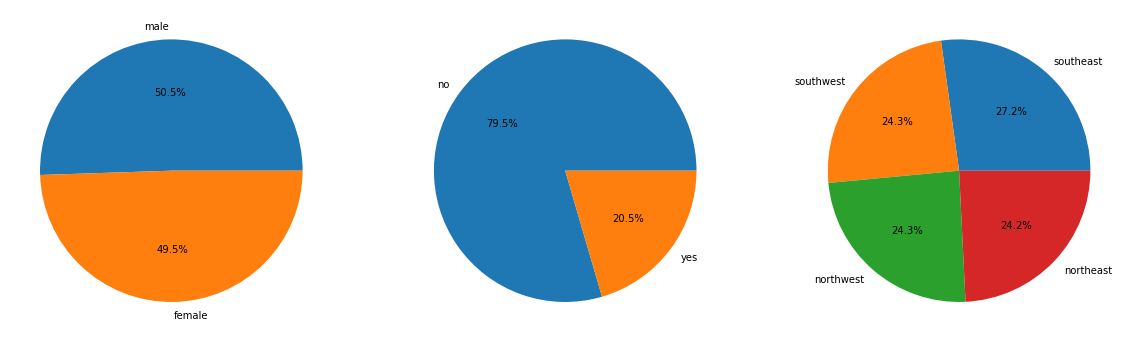

In [10]:
features = ['sex', 'smoker', 'region']
  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
  
    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
  
plt.show()

Above is the pie chart for the sex, smoker and region column. The data provided is equally distributed among the sex and the region column but in smoker column there is ratio of 80:20

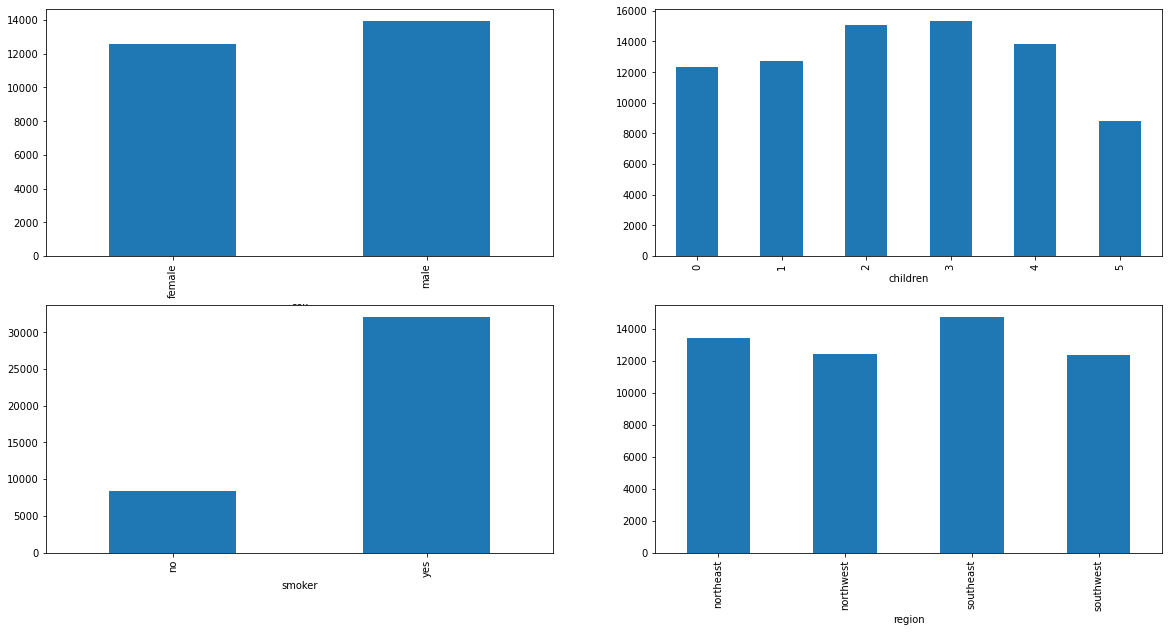

In [11]:
features = ['sex', 'children', 'smoker', 'region']
  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['charges'].plot.bar()
plt.show()

Above is the comparison between charges paid between different groups
-Charges are higher for males as compared to females
-Premium charged for smokers is very high as compared to non-smokers
-Charges are almost approx same in all four regions

In [14]:
features = ['age', 'bmi']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

Above is the sctterplot for the charges paid versus age and bmi respectively. Here we can say that smokers have to pay high charges. Also premium increases with the age of the person.

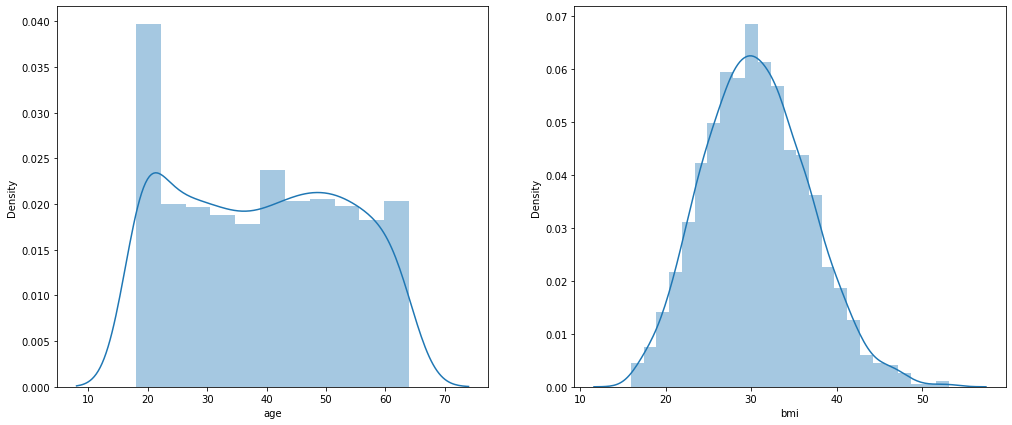

In [15]:
features = ['age', 'bmi']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.distplot(df[col])
plt.show()

Above is the distribution plot of the age and bmi column. Data in both age and bmi column follow a normal distribution.

In [25]:
features = ['age', 'bmi']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(df[col])
plt.show()

In the above boxplot of the age and bmi column, we can view that there are outliers present in the bmi column

In [19]:
df.shape, df[df['bmi']<45].shape

((1338, 7), (1318, 7))

Here on checking we found that on losing 20 datapoints we can free our dataset from outliers.

In [20]:
df = df[df['bmi']<45]

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [24]:
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

Here performing label encoding of the categorical columns

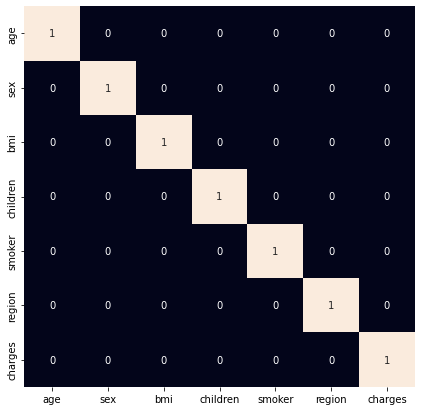

In [29]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

From the above heatmap we can analyse that there is no high correlation between features

In [28]:
features = df.drop('charges', axis=1)
target = df['charges']
  
X_train, X_val,\
Y_train, Y_val = train_test_split(features, target,
                                  test_size=0.2,
                                  random_state=22)
X_train.shape, X_val.shape

((1054, 6), (264, 6))

Splitting our data into training and validation data.

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [33]:
models = [LinearRegression(),
          RandomForestRegressor(), AdaBoostRegressor(),
          Lasso(), Ridge()]
  
for i in range(5):
    models[i].fit(X_train, Y_train)
  
    print(f'{models[i]} : ')
    pred_train = models[i].predict(X_train)
    print('Training Error : ', mape(Y_train, pred_train))
  
    pred_val = models[i].predict(X_val)
    print('Validation Error : ', mape(Y_val, pred_val))
    print()

LinearRegression() : 
Training Error :  0.418880562922412
Validation Error :  0.4504495878121592

RandomForestRegressor() : 
Training Error :  0.11928262575784178
Validation Error :  0.2439367548993494

AdaBoostRegressor() : 
Training Error :  0.6780352796412992
Validation Error :  0.7348596914416384

Lasso() : 
Training Error :  0.41884184570784494
Validation Error :  0.45044188913851746

Ridge() : 
Training Error :  0.4190871910460793
Validation Error :  0.4508207645628372



Here Mean Absolute Percentage Error metric is used to evaluate the model’s performance. 0.1 value of MAPE means that the error in the predictions from the actual value will be around 10%.

Out of all the models RandomForestModel is giving the least value for the mean absolute percentage error this means predictions made by this model are close to the real values as compared to the other model.